In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Loading the datasets**


In [ ]:
diag_df=pd.read_csv('/content/Breast Cancer Wisconsin (Diagnostic) -wbc.csv')
prog_df=pd.read_csv('/content/prognostic-wbc.csv')

In [ ]:
diag_df.columns

Index(['842302', 'M', '17.99', '10.38', '122.8', '1001', '0.1184', '0.2776',
       '0.3001', '0.1471', '0.2419', '0.07871', '1.095', '0.9053', '8.589',
       '153.4', '0.006399', '0.04904', '0.05373', '0.01587', '0.03003',
       '0.006193', '25.38', '17.33', '184.6', '2019', '0.1622', '0.6656',
       '0.7119', '0.2654', '0.4601', '0.1189'],
      dtype='object')

In [ ]:
prog_df.columns

Index(['119513', 'N', '31', '18.02', '27.6', '117.5', '1013', '0.09489',
       '0.1036', '0.1086', '0.07055', '0.1865', '0.06333', '0.6249', '1.89',
       '3.972', '71.55', '0.004433', '0.01421', '0.03233', '0.009854',
       '0.01694', '0.003495', '21.63', '37.08', '139.7', '1436', '0.1195',
       '0.1926', '0.314', '0.117', '0.2677', '0.08113', '5', '5.1'],
      dtype='object')

In [ ]:
diag_df.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [ ]:
prog_df.head()

,119513,N,31,18.02,27.6,117.5,1013,0.09489,0.1036,0.1086,...,139.7,1436,0.1195,0.1926,0.314,0.117,0.2677,0.08113,5,5.1
0,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
1,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
2,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
3,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
4,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.1569,0.1664,...,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0


In [ ]:
prog_df=prog_df.drop(['31','5','5.1'],axis=1)

In [ ]:
diag_df=diag_df.set_axis(['Id','Outcome','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean',
                        'symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se',
                        'symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst',
                        'concave points_worst','symmetry_worst','fractal_dimension_worst'],axis=1)

In [ ]:
diag_df.head()

,Id,Outcome,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [ ]:
prog_df=prog_df.set_axis(['Id','Outcome','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean',
                        'symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se',
                        'symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst',
                        'concave points_worst','symmetry_worst','fractal_dimension_worst'],axis=1)

In [ ]:
prog_df.head()

,Id,Outcome,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,8423,N,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,N,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,...,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067
2,843483,N,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,843584,R,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,R,12.75,15.29,84.60,502.7,0.11890,0.1569,0.1664,0.07666,...,15.51,20.37,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790


**Combining the datasets**

In [ ]:
combined_df=pd.concat([diag_df,prog_df])

In [ ]:
combined_df.head()

,Id,Outcome,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


**EDA**

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 765 entries, 0 to 196
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       765 non-null    int64  
 1   Outcome                  765 non-null    object 
 2   radius_mean              765 non-null    float64
 3   texture_mean             765 non-null    float64
 4   perimeter_mean           765 non-null    float64
 5   area_mean                765 non-null    float64
 6   smoothness_mean          765 non-null    float64
 7   compactness_mean         765 non-null    float64
 8   concavity_mean           765 non-null    float64
 9   concave points_mean      765 non-null    float64
 10  symmetry_mean            765 non-null    float64
 11  fractal_dimension_mean   765 non-null    float64
 12  radius_se                765 non-null    float64
 13  texture_se               765 non-null    float64
 14  perimeter_se             765 no

In [ ]:
combined_df.describe()

,Id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,7.650000e+02,765.000000,765.000000,765.000000,765.000000,765.000000,765.00000,765.000000,765.000000,765.000000,...,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,2.310421e+07,14.967397,20.063373,97.819190,735.537255,0.097969,0.11403,0.105953,0.058561,0.184076,...,17.480365,26.828065,115.681294,1014.089673,0.135336,0.282495,0.314135,0.131015,0.298509,0.085685
std,1.085173e+08,3.723054,4.476003,25.617622,378.088893,0.013950,0.05443,0.082670,0.040993,0.027826,...,5.123292,6.402723,35.471380,617.143651,0.023169,0.165818,0.212431,0.067130,0.066936,0.019124
min,8.423000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.01938,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.654230e+05,12.210000,16.940000,78.290000,458.700000,0.087920,0.07112,0.037350,0.024020,0.163800,...,13.460000,22.070000,87.400000,553.000000,0.120100,0.163300,0.144900,0.078280,0.255400,0.072530
50%,9.030110e+05,14.250000,19.660000,93.600000,632.400000,0.097730,0.10740,0.092510,0.052660,0.181400,...,16.310000,26.380000,108.400000,809.800000,0.135100,0.246300,0.291300,0.130800,0.286800,0.081340
75%,8.711202e+06,17.600000,22.490000,115.200000,966.600000,0.106800,0.14570,0.156900,0.086910,0.198100,...,20.960000,30.960000,139.900000,1321.000000,0.149700,0.374800,0.439900,0.182700,0.325800,0.094690
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.34540,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
combined_df.isnull().sum()

Id                         0
Outcome                    0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
combined_df_copy=combined_df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
combined_df['Outcome'] = label_encoder.fit_transform(combined_df['Outcome'])

**Plottings**

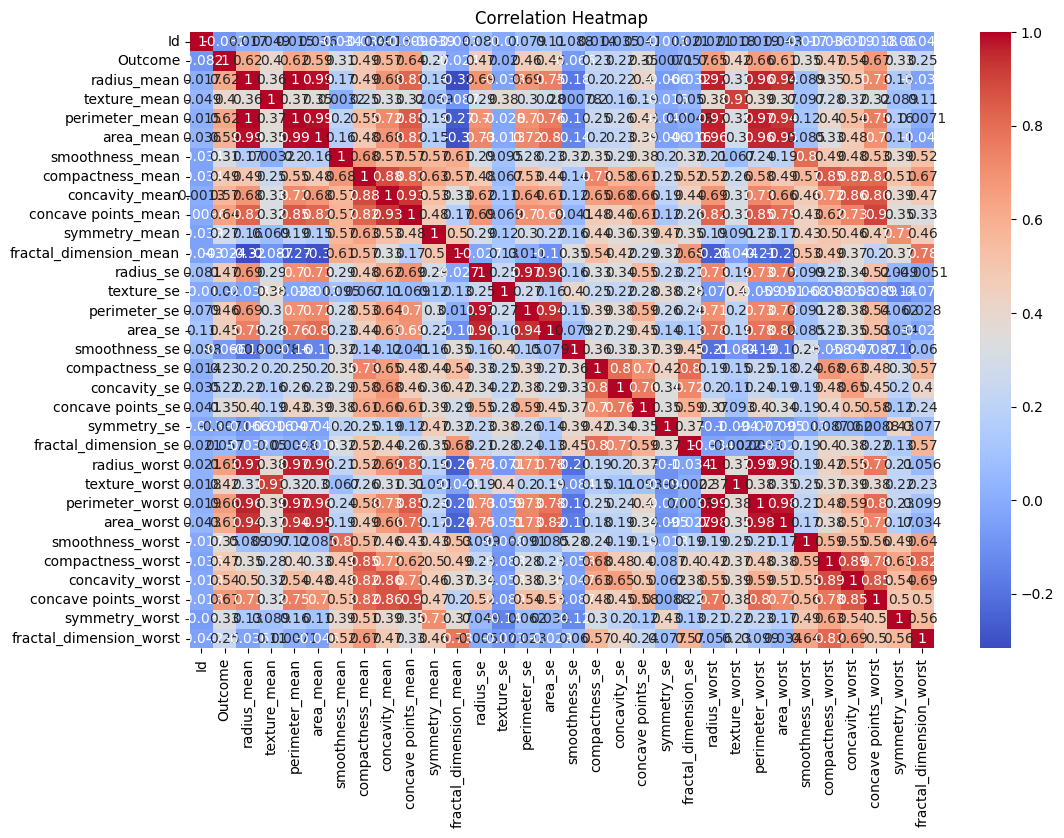

In [ ]:
# Heat map
plt.figure(figsize=(12,8))
sns.heatmap(combined_df.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

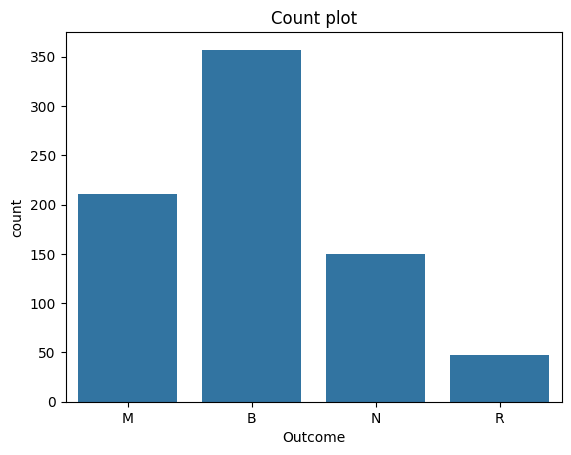

In [ ]:
# count plot
sns.countplot(x='Outcome', data=combined_df_copy)
plt.title('Count plot')
plt.show()

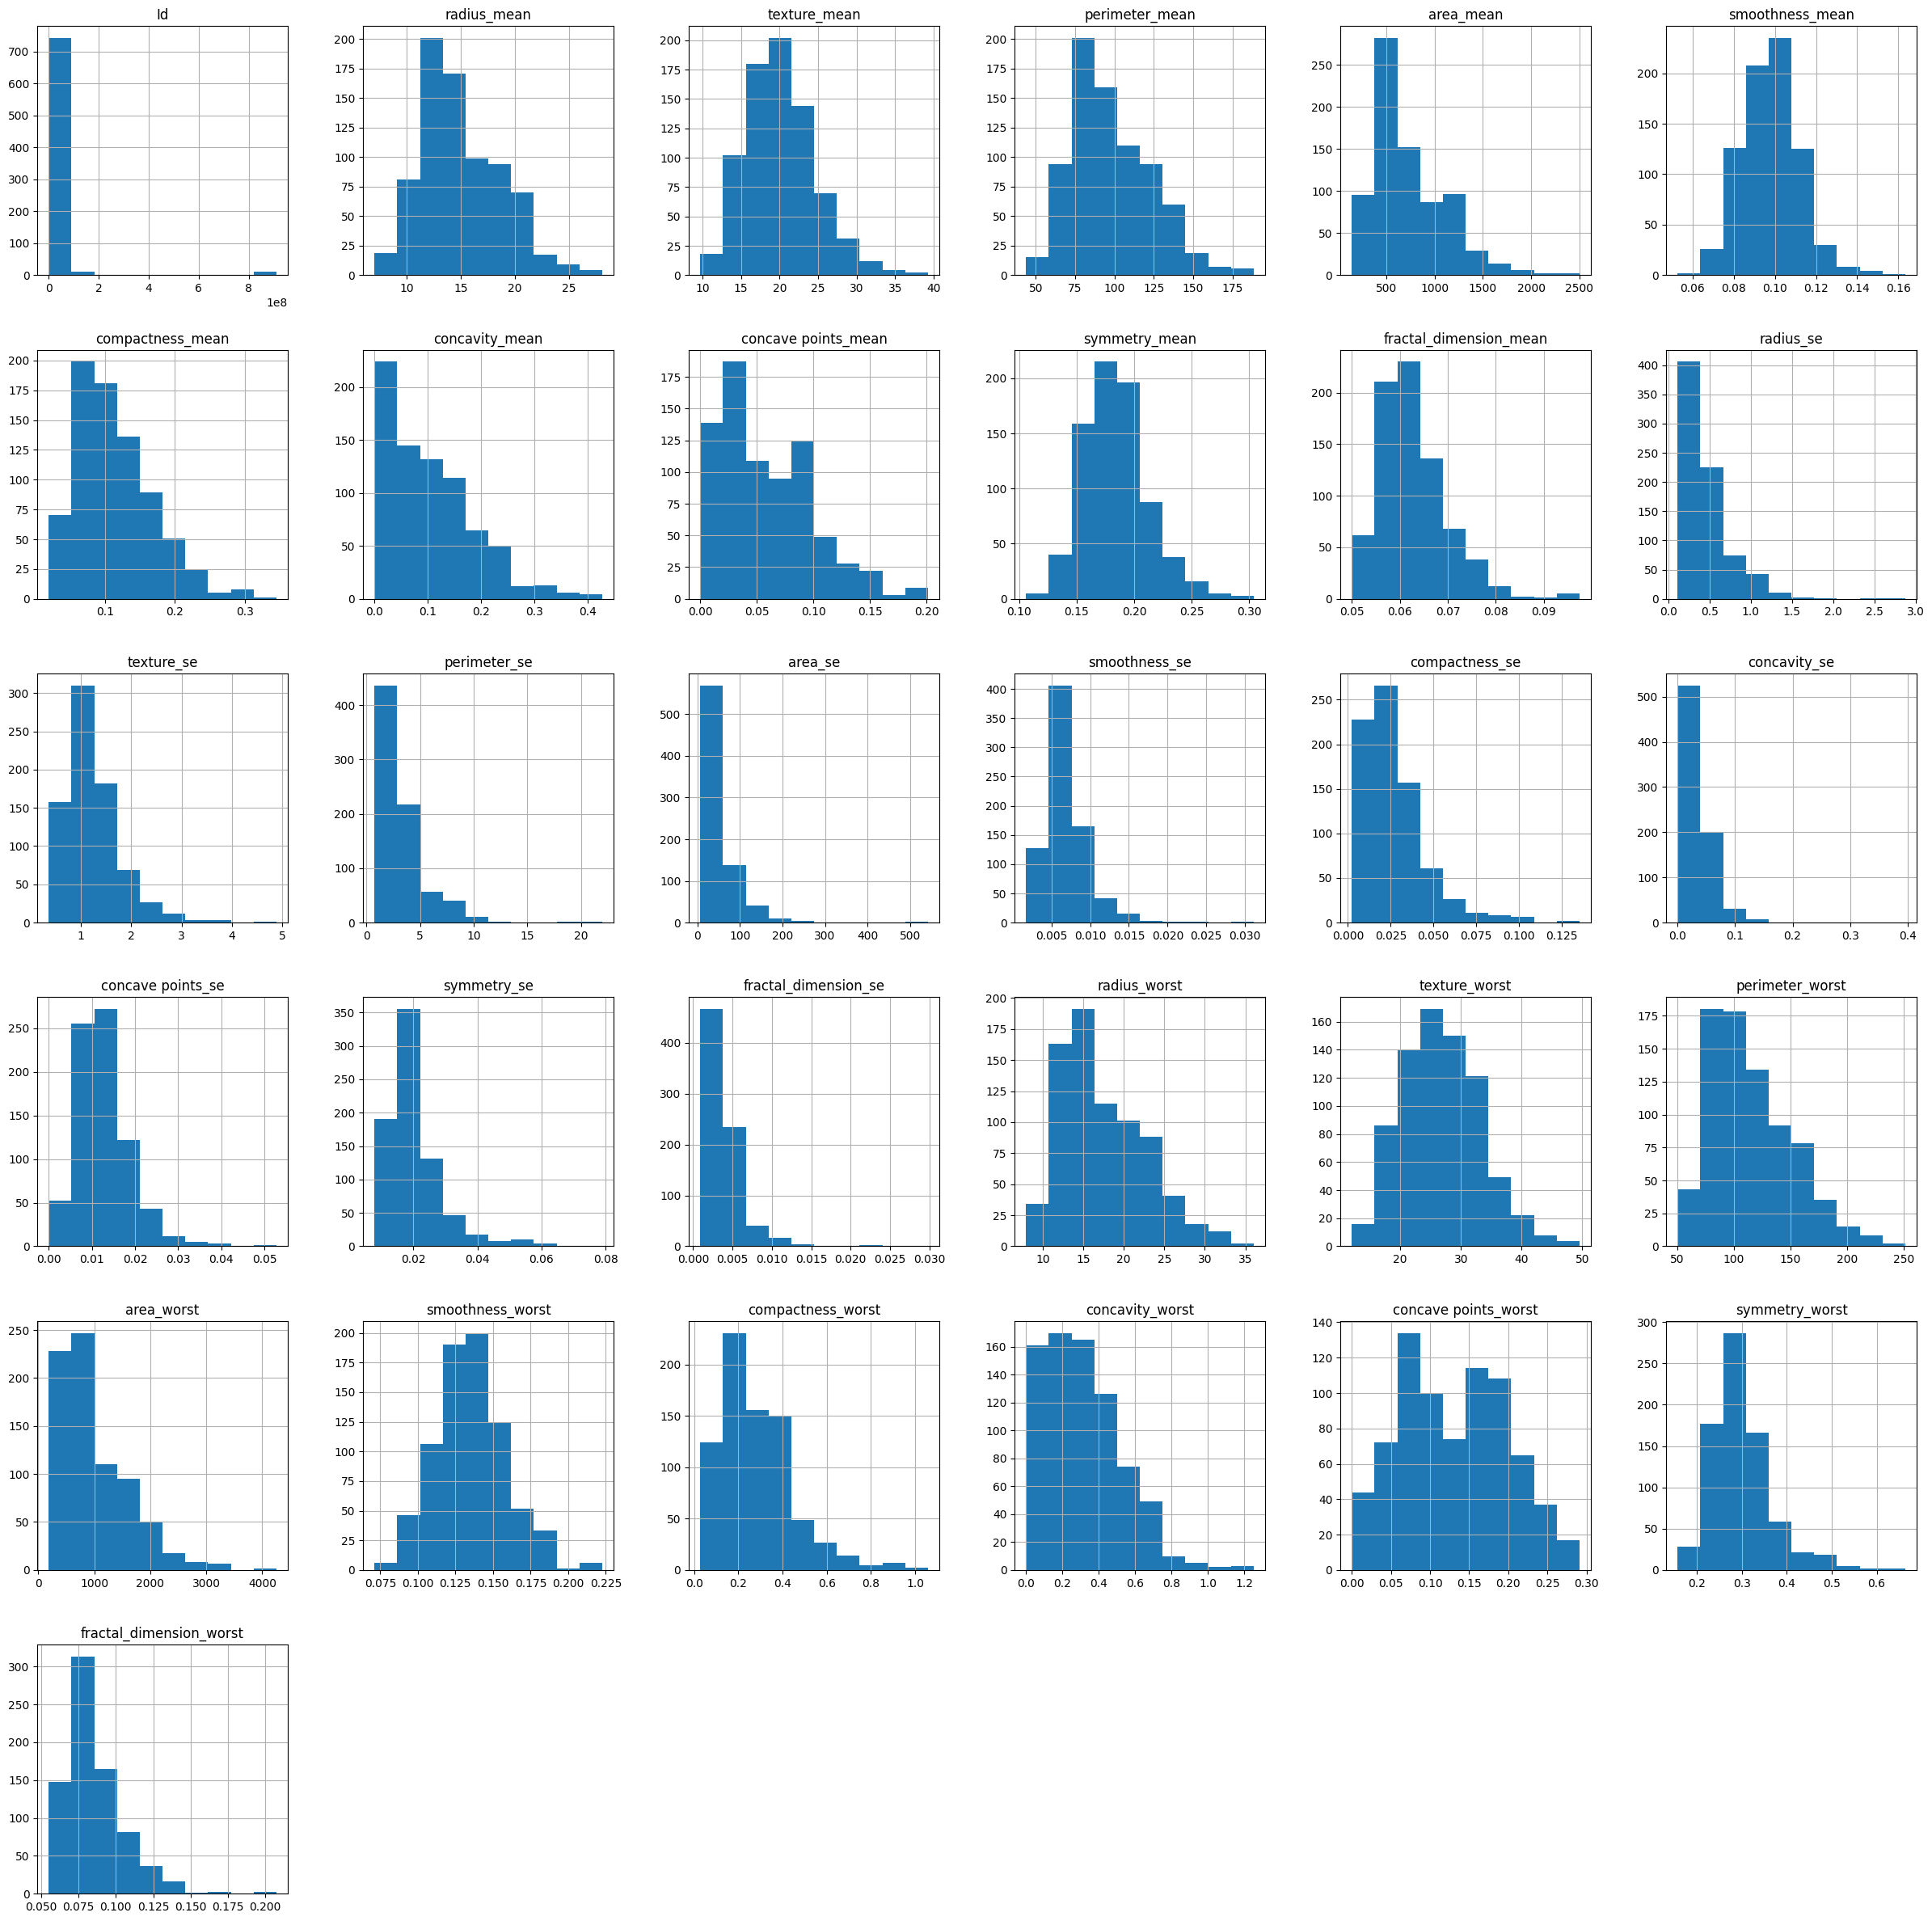

In [ ]:
# Histogram
combined_df_copy.hist(figsize=(30,30))
plt.show()

**Nan Value plotting**

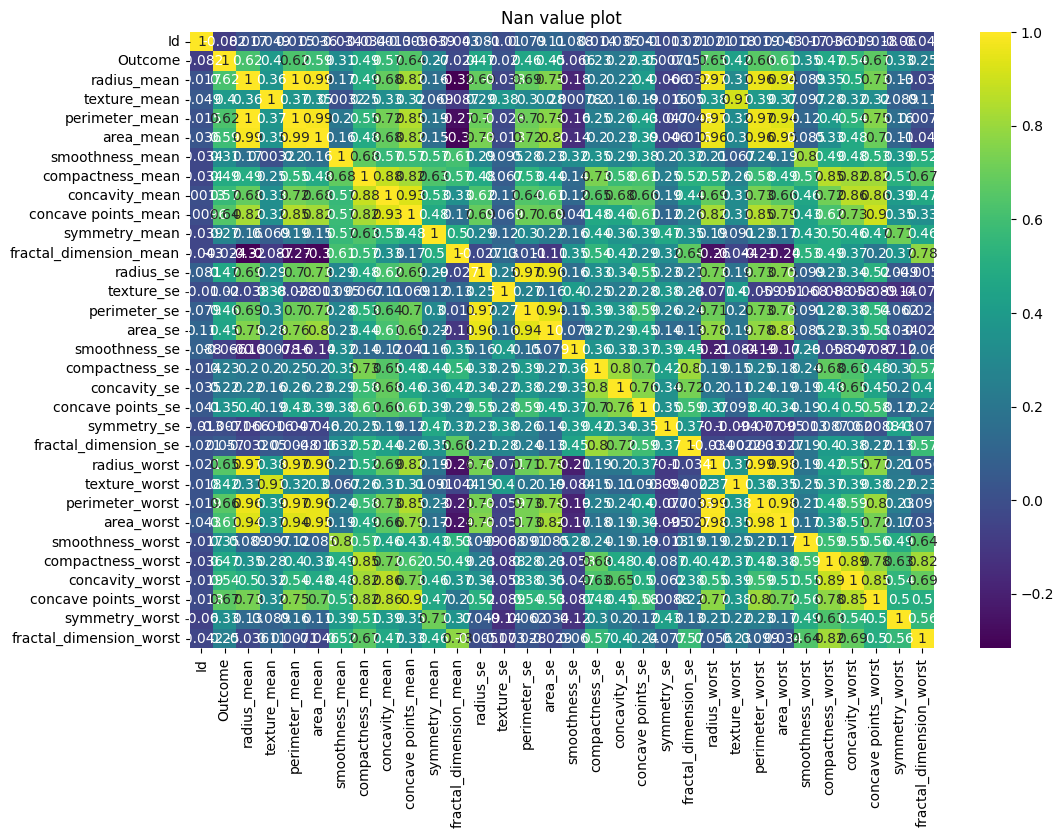

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(combined_df.corr(),annot=True,cmap='viridis')
plt.title("Nan value plot")
plt.show()

**Imputation**

In [ ]:
combined_df.isnull().sum()

Id                         0
Outcome                    0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=combined_df.drop(['Outcome'], axis = 1)
y=combined_df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Finding Feature importance and plotting**

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
acc = accuracy_score(y_test, y_pred)
cls_rt=classification_report(y_test,y_pred)
print("accuracy=",acc)

accuracy= 0.5882352941176471


In [ ]:
print("classification report:\n",cls_rt)

classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       0.31      0.35      0.33        43
           2       0.14      0.09      0.11        33
           3       0.00      0.00      0.00         5

    accuracy                           0.59       153
   macro avg       0.35      0.36      0.35       153
weighted avg       0.57      0.59      0.58       153



In [ ]:
feature_imp = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_imp

Id                         0.049335
radius_mean                0.026014
texture_mean               0.023353
perimeter_mean             0.047922
area_mean                  0.036829
smoothness_mean            0.014545
compactness_mean           0.019527
concavity_mean             0.034815
concave points_mean        0.049529
symmetry_mean              0.014531
fractal_dimension_mean     0.013440
radius_se                  0.029938
texture_se                 0.015127
perimeter_se               0.018972
area_se                    0.020709
smoothness_se              0.013641
compactness_se             0.014335
concavity_se               0.019424
concave points_se          0.016290
symmetry_se                0.016109
fractal_dimension_se       0.012590
radius_worst               0.107815
texture_worst              0.026901
perimeter_worst            0.098662
area_worst                 0.061433
smoothness_worst           0.022387
compactness_worst          0.020966
concavity_worst            0

Text(0.5, 1.0, 'Visualization of features')

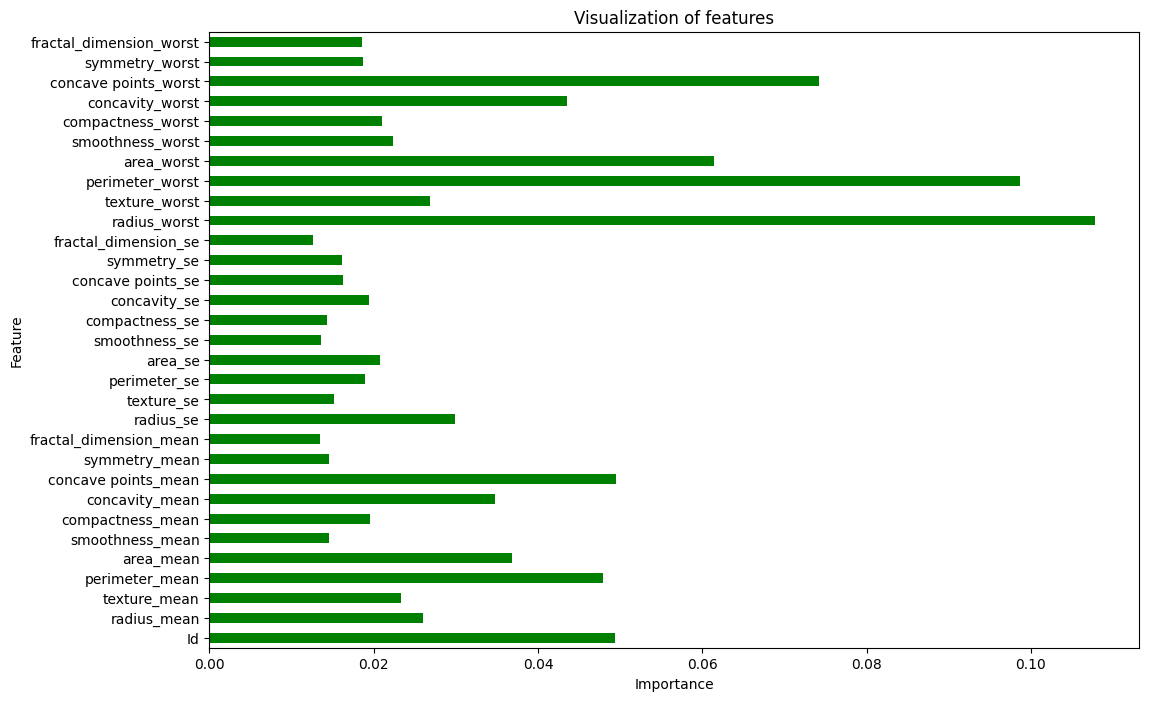

In [ ]:
# plotting
plt.figure(figsize=(12,8))
feature_imp.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Visualization of features")

 **Using compare ml algorithms to find accuracy**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# prepare models
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

In [ ]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(name, cv_results.mean(), cv_results.std())

LR 0.33549213943950784 0.2336169149979518
LDA 0.5951982228298017 0.3194222890692406
KNN 0.19470266575529735 0.13782638482014128
DTC 0.5023752563226248 0.28225079699971234
NB 0.22722146274777852 0.22915744778973526
SVM 0.4582194121667806 0.27232211533451717


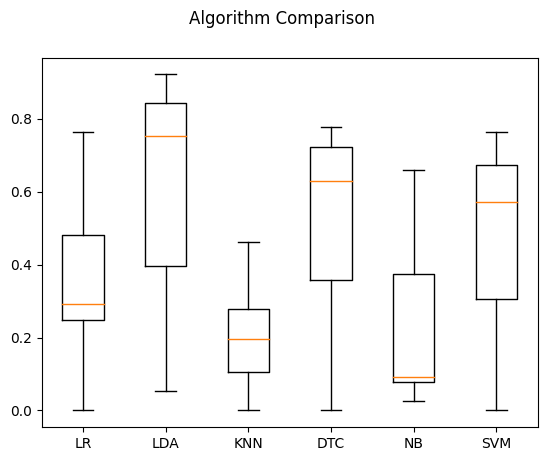

In [ ]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()